**python -m venv ./venv**

Run that in your terminal to set up the virtual environment, then run the below command. If you don't care about using a virtual environment, just run the below command to install the required packages for your current version of Python.

In [24]:
%pip install pandas numpy matplotlib seaborn scikit-learn tensorflow wordcloud

Note: you may need to restart the kernel to use updated packages.


You can also run the following:

In [25]:
%pip install -r requirements.txt

  Obtaining dependency information for asttokens==2.4.1 from https://files.pythonhosted.org/packages/45/86/4736ac618d82a20d87d2f92ae19441ebc7ac9e7a581d7e58bbe79233b24a/asttokens-2.4.1-py2.py3-none-any.whl.metadata
  Using cached asttokens-2.4.1-py2.py3-none-any.whl.metadata (5.2 kB)
  Obtaining dependency information for certifi==2024.2.2 from https://files.pythonhosted.org/packages/ba/06/a07f096c664aeb9f01624f858c3add0a4e913d6c96257acb4fce61e7de14/certifi-2024.2.2-py3-none-any.whl.metadata
  Using cached certifi-2024.2.2-py3-none-any.whl.metadata (2.2 kB)
  Obtaining dependency information for charset-normalizer==3.3.2 from https://files.pythonhosted.org/packages/3e/33/21a875a61057165e92227466e54ee076b73af1e21fe1b31f1e292251aa1e/charset_normalizer-3.3.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Using cached charset_normalizer-3.3.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata (33 kB)
  Obtaining dependency information for comm==0.2.1 from https://files.pythonhosted.org/packages/6e/

**Process 1: Data Cleaning**

In [26]:
#import data
import pandas as pd
import numpy as np

data = pd.read_csv('Flight Price Prediction Data/Clean_Dataset.csv')
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [27]:
#drop 1st column
data = data.drop(data.columns[0], axis=1)
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [28]:
#CREATE NEW COLUMN TO CONVERT PRICES TO USD

#conversion rate from INR to USD
conversion_rate = 0.012

#function to convert price from INR to USD
def convert_to_usd(price_inr):
    return price_inr * conversion_rate

#create new column for USD price, applying conversion and round to the nearest cent
data['priceUSD'] = data['price'].apply(convert_to_usd).apply(lambda x: round(x, 2))

#rename current price column to indicate it is INR (Indian Rupee)
data = data.rename(columns={'price': 'priceINR'})

data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,priceINR,priceUSD
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,71.44
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,71.44
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,71.47
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,71.46
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,71.46


In [29]:
#CONVERT STOPS VALUES FROM STRING TO NUMERICAL

#mapping dictionary
number_mapping = {'zero': 0, 'one': 1, 'two_or_more': 2}

# Convert string versions of numbers to numerical values
data['stops'] = data['stops'].map(number_mapping)

data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,priceINR,priceUSD
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953,71.44
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953,71.44
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956,71.47
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955,71.46
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955,71.46


**Insights**

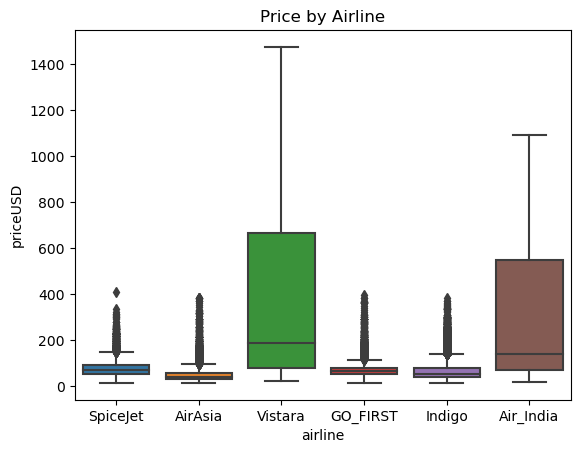

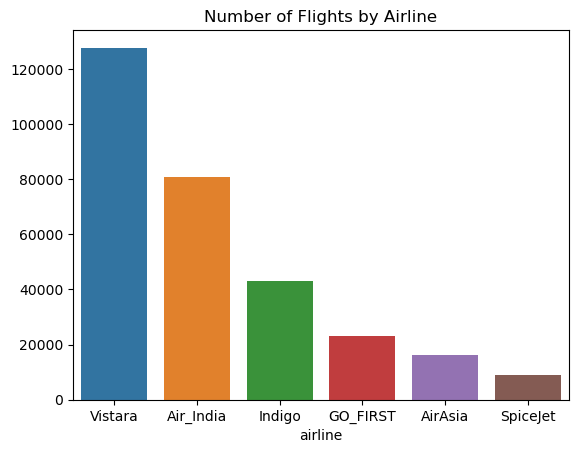

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring the relationship between airline and price with a box plot
plt.title('Price by Airline')
sns.boxplot(x='airline', y='priceUSD', data=data)
plt.show()

# Count the number of datapoints for each airline and display in a chart to see if the number of flights in the dataset is influencing the price
airline_counts = data['airline'].value_counts()
plt.title('Number of Flights by Airline')
sns.barplot(x=airline_counts.index, y=airline_counts.values)
plt.show()

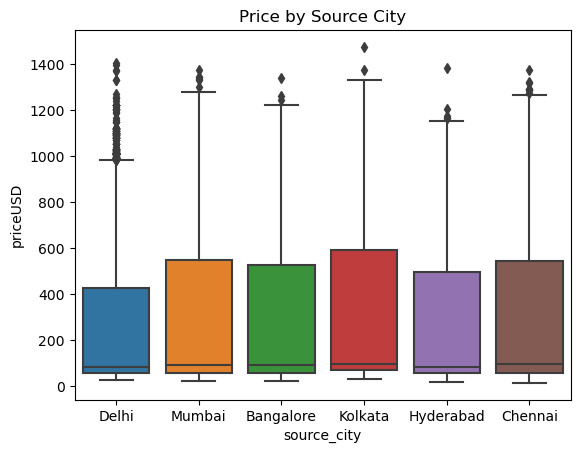

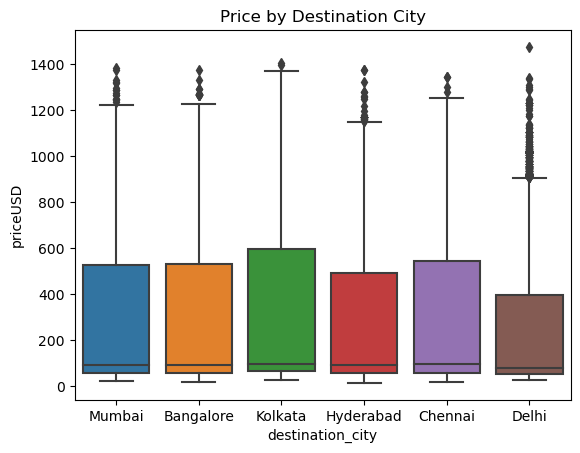

In [34]:
# Exploring the relationship between source_city and price with a box plot
plt.title('Price by Source City')
sns.boxplot(x='source_city', y='priceUSD', data=data)
plt.show()

# Exploring the relationship between destination_city and price with a box plot
plt.title('Price by Destination City')
sns.boxplot(x='destination_city', y='priceUSD', data=data)
plt.show()

# Neither of these are very fruitful, so we will not use these columns in our report

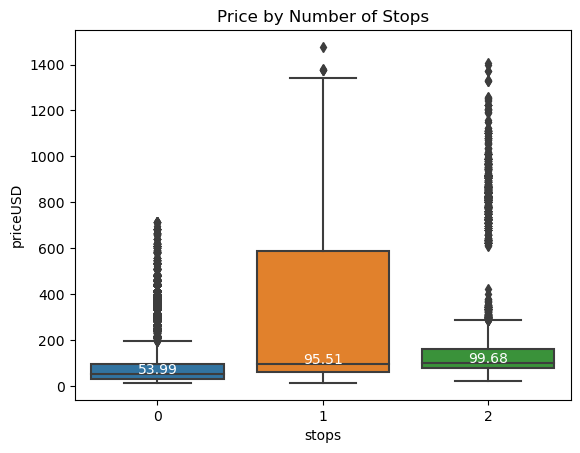

In [39]:
# Exploring the relationship between stops and price with a box plot
plt.title('Price by Number of Stops')
sns.boxplot(x='stops', y='priceUSD', data=data)
#add a label for the median price for each number of stops
medians = data.groupby('stops')['priceUSD'].median()
for xtick in plt.gca().get_xticks():
    plt.text(xtick, medians[xtick], medians[xtick], horizontalalignment='center', color='w')
plt.show()

# This is interesting because in the US, more layovers usually implies a cheaper flight, but a nonstop flight is cheaper in India. This is likely due to the fact that the dataset is limited to domestic flights in India, and the number of stops relates to the distance traveled.

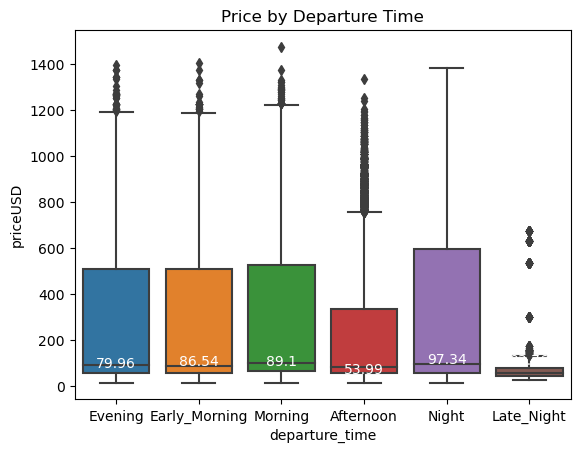

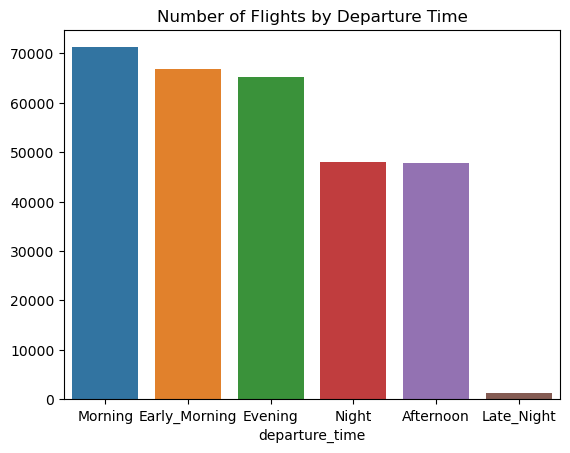

In [43]:
# Exploring the relationship between departure_time and price with a box plot
plt.title('Price by Departure Time')
sns.boxplot(x='departure_time', y='priceUSD', data=data)
medians = data.groupby('departure_time')['priceUSD'].median()
for xtick in plt.gca().get_xticks():
    plt.text(xtick, medians[xtick], medians[xtick], horizontalalignment='center', color='w')
plt.show()

# Display how many of each departure time there are in the dataset with a bar graph
departure_time_counts = data['departure_time'].value_counts()
plt.title('Number of Flights by Departure Time')
sns.barplot(x=departure_time_counts.index, y=departure_time_counts.values)
plt.show()

# This is interesting because the price of flights departing in the afternoon is the cheapest, which is unexpected

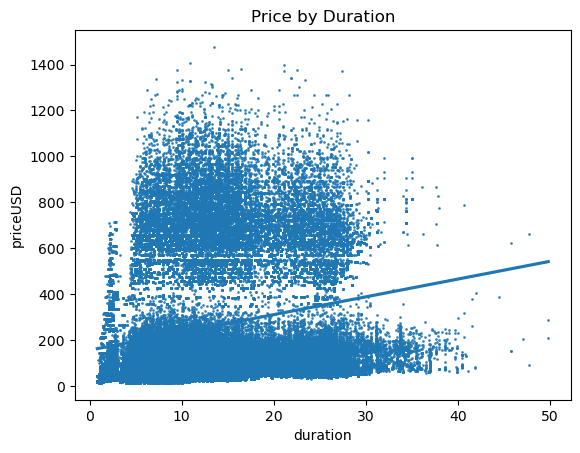

In [48]:
# Exploring the relationship between duration and price with a scatter plot.
plt.title('Price by Duration')
sns.regplot(x='duration', y='priceUSD', data=data, scatter_kws={'s': 1})
plt.show()
# This plot is not that conclusive and would be better suited to a regression model

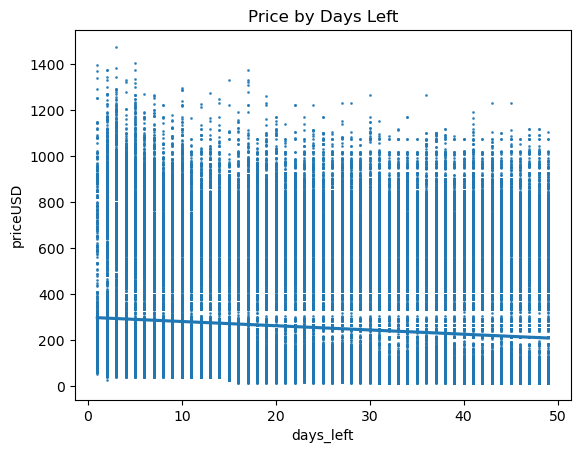

In [50]:
# Exploring the relationship between days_left and price with a scatter plot.
plt.title('Price by Days Left')
sns.regplot(x='days_left', y='priceUSD', data=data, scatter_kws={'s': 1})
plt.show()

# The trend shows that the further from the departure date, the cheaper the flight. This is expected, as flights are usually cheaper when booked in advance, but it would interesting to see if this trend holds for flights booked within a week of the departure date.
# However, this plot is not that conclusive and would be better suited to a regression model